## 'Shoes vs Trouser vs T-Shirts'

In [70]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [75]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [76]:
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.plots import *

`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [77]:
PATH = "./preprocessed/"
sz=224

It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns `True` before you proceed. If you have problems with this, please check the FAQ and ask for help on [the forums](http://forums.fast.ai).

In [78]:
torch.cuda.is_available()

False

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return `True`, you may want to look into why.

In [79]:
torch.backends.cudnn.enabled

True

## First look at shoe pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'shoes' , 'trouser' and 'tshirt').

In [80]:
os.listdir(PATH)

['tmp', 'train', 'valid', 'models']

In [81]:
os.listdir(f'{PATH}valid')

['shoes', 'trouser', 'tshirt']

In [82]:
files = os.listdir(f'{PATH}valid/shoes')[:5]
files

['shoes460.jpg',
 'shoes454.jpg',
 'shoes439.jpg',
 'shoes453.jpg',
 'shoes463.jpg']

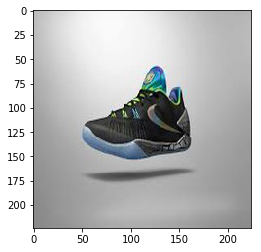

In [85]:
img = plt.imread(f'{PATH}valid/shoes/{files[1]}')
plt.imshow(img);

Here is how the raw data looks like

In [86]:
img.shape

(224, 224, 3)

In [87]:
img[:4,:4]

array([[[186, 186, 186],
        [187, 187, 187],
        [187, 187, 187],
        [189, 189, 189]],

       [[186, 186, 186],
        [187, 187, 187],
        [187, 187, 187],
        [189, 189, 189]],

       [[186, 186, 186],
        [187, 187, 187],
        [187, 187, 187],
        [189, 189, 189]],

       [[186, 186, 186],
        [187, 187, 187],
        [188, 188, 188],
        [189, 189, 189]]], dtype=uint8)

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition.

Here's how to train and evalulate a *shoes vs tshirts vs trousers* model in 3 lines of code, and under 20 seconds(with GPU):

In [88]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(3*1e-2, 2)

A Jupyter Widget

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s, loss=1.54]

  6%|▌         | 1/18 [00:00<00:01,  9.03it/s, loss=1.54]

  6%|▌         | 1/18 [00:00<00:03,  4.85it/s, loss=1.26]

  6%|▌         | 1/18 [00:00<00:03,  4.41it/s, loss=1.03]

 17%|█▋        | 3/18 [00:00<00:01, 13.15it/s, loss=1.03]

 17%|█▋        | 3/18 [00:00<00:01, 11.65it/s, loss=0.855]

 17%|█▋        | 3/18 [00:00<00:01, 10.79it/s, loss=0.726]

 17%|█▋        | 3/18 [00:00<00:01, 10.19it/s, loss=0.61] 

 17%|█▋        | 3/18 [00:00<00:01,  9.66it/s, loss=0.579]

 17%|█▋        | 3/18 [00:00<00:01,  8.84it/s, loss=0.529]

 44%|████▍     | 8/18 [00:00<00:00, 23.49it/s, loss=0.529]

 44%|████▍     | 8/18 [00:00<00:00, 21.37it/s, loss=0.489]

 44%|████▍     | 8/18 [00:00<00:00, 20.10it/s, loss=0.462]

 44%|████▍     | 8/18 [00:00<00:00, 18.68it/s, loss=0.418]

 44%|████▍     | 8/18 [00:00<00:00, 17.65it/s, loss=0.429]

 67%|██████▋   | 12/18 [00:00<00:00, 26.42it/s, loss=0.429]

 67%|██████▋   | 12/18 [00:00<00:00, 25.47it/s, loss=0.439]

 67%|██████▋   | 12/18 [00:00<00:00, 24.14it/s, loss=0.417]

 67%|██████▋   | 12/18 [00:00<00:00, 22.76it/s, loss=0.387]

 67%|██████▋   | 12/18 [00:00<00:00, 20.96it/s, loss=0.362]

 89%|████████▉ | 16/18 [00:00<00:00, 27.82it/s, loss=0.362]

 89%|████████▉ | 16/18 [00:00<00:00, 26.98it/s, loss=0.342]

 89%|████████▉ | 16/18 [00:00<00:00, 26.32it/s, loss=0.322]

epoch      trn_loss   val_loss   accuracy   
    0      0.322408   0.083026   0.97619   
  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s, loss=0.311]

  6%|▌         | 1/18 [00:00<00:03,  5.12it/s, loss=0.311]

  6%|▌         | 1/18 [00:00<00:04,  4.24it/s, loss=0.293]

  6%|▌         | 1/18 [00:00<00:04,  3.73it/s, loss=0.277]

  6%|▌         | 1/18 [00:00<00:05,  3.38it/s, loss=0.265]

 22%|██▏       | 4/18 [00:00<00:01, 13.44it/s, loss=0.265]

 22%|██▏       | 4/18 [00:00<00:01, 12.47it/s, loss=0.251]

 22%|██▏       | 4/18 [00:00<00:01, 11.66it/s, loss=0.238]

 22%|██▏       | 4/18 [00:00<00:01, 11.17it/s, loss=0.23] 

 22%|██▏       | 4/18 [00:00<00:01, 10.71it/s, loss=0.231]

 22%|██▏       | 4/18 [00:00<00:01, 10.16it/s, loss=0.22] 

 50%|█████     | 9/18 [00:00<00:00, 22.61it/s, loss=0.22]

 50%|█████     | 9/18 [00:00<00:00, 21.65it/s, loss=0.211]

 50%|█████     | 9/18 [00:00<00:00, 20.62it/s, loss=0.202]

 50%|█████     | 9/18 [00:00<00:00, 19.11it/s, loss=0.194]

 50%|█████     | 9/18 [00:00<00:00, 18.07it/s, loss=0.188]

 72%|███████▏  | 13/18 [00:00<00:00, 26.04it/s, loss=0.188]

 72%|███████▏  | 13/18 [00:00<00:00, 25.12it/s, loss=0.181]

 72%|███████▏  | 13/18 [00:00<00:00, 24.21it/s, loss=0.18] 

 72%|███████▏  | 13/18 [00:00<00:00, 23.43it/s, loss=0.174]

 72%|███████▏  | 13/18 [00:00<00:00, 22.50it/s, loss=0.167]

 72%|███████▏  | 13/18 [00:00<00:00, 21.72it/s, loss=0.161]

    1      0.160679   0.069284   0.984127  


[array([0.06928]), 0.9841269841269841]

## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (i.e. those with highest probability that are correct)
4. The most incorrect labels of each class (i.e. those with highest probability that are incorrect)
5. The most uncertain labels (i.e. those with probability closest to 0.5).

In [89]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['shoes', 'trouser', 'tshirt']

In [91]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(126, 3)

In [92]:
log_preds[:10]

array([[ -0.00022,  -8.6881 ,  -9.82649],
       [ -0.     , -16.21945, -19.0156 ],
       [ -0.00001, -11.62628, -14.11308],
       [ -0.00007,  -9.66496, -12.81611],
       [ -0.     , -14.92183, -17.11747],
       [ -0.00001, -12.12549, -15.82616],
       [ -0.00007,  -9.72313, -12.0092 ],
       [ -0.00008,  -9.77353, -10.48251],
       [ -0.00044,  -8.10728,  -8.86795],
       [ -0.00015, -12.01805,  -8.84589]], dtype=float32)

In [93]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [94]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [95]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [96]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [97]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


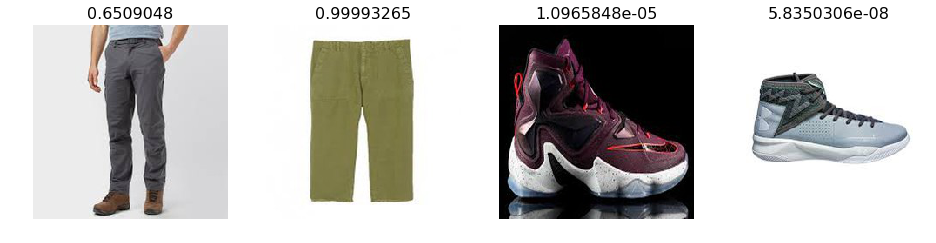

In [98]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [99]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct shoes


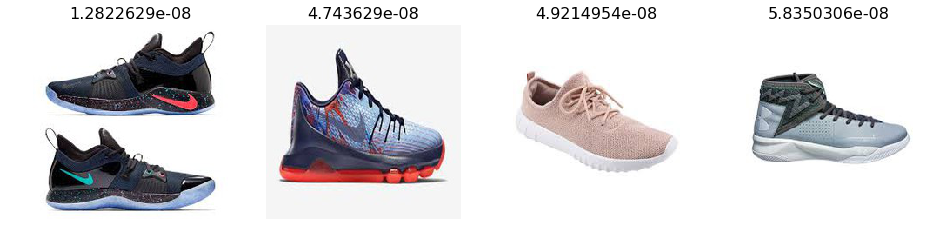

In [100]:
plot_val_with_title(most_by_correct(0, True), "Most correct shoes")

Most correct pants


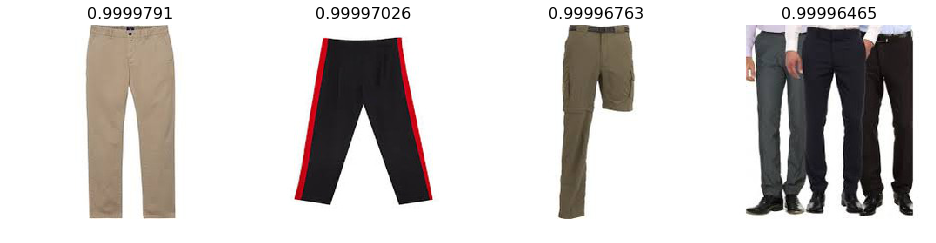

In [101]:
plot_val_with_title(most_by_correct(1, True), "Most correct pants")

Most correct shirts


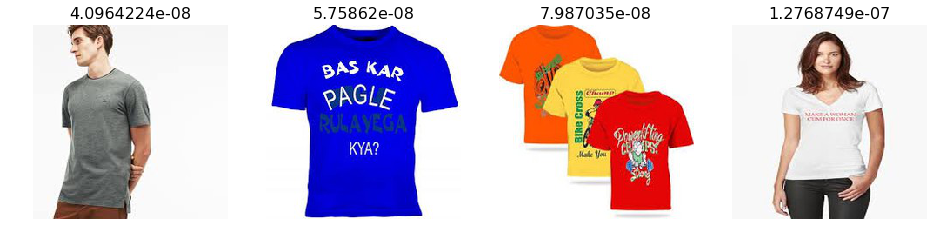

In [102]:
plot_val_with_title(most_by_correct(2, True), "Most correct shirts")

Most incorrect pants


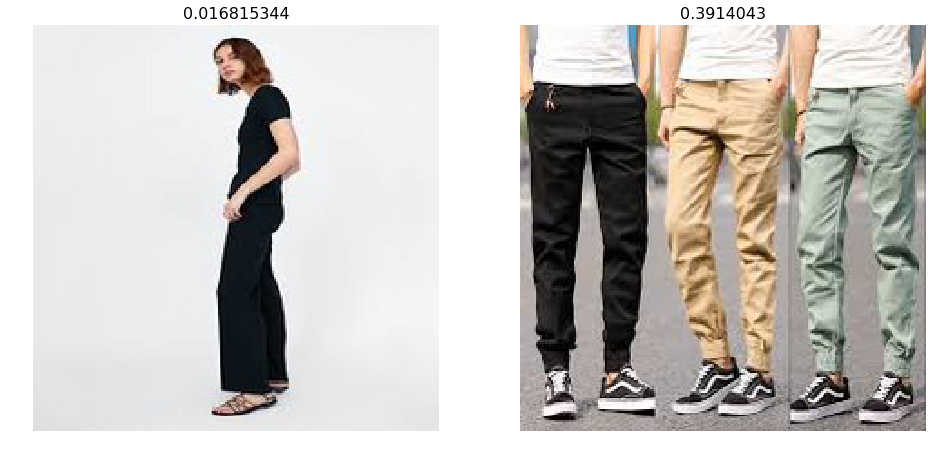

In [103]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect pants")

Most uncertain predictions


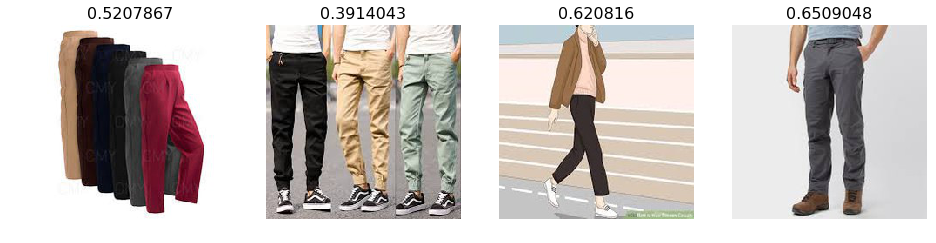

In [104]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affects model performance.

The method `learn.lr_find()` helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), where we simply keep increasing the learning rate from a very small value, until the loss stops decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [105]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [106]:
lrf=learn.lr_find()

A Jupyter Widget

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s, loss=1.72]

  6%|▌         | 1/18 [00:00<00:01,  9.25it/s, loss=1.72]

  6%|▌         | 1/18 [00:00<00:02,  6.20it/s, loss=1.64]

  6%|▌         | 1/18 [00:00<00:03,  5.51it/s, loss=1.55]

  6%|▌         | 1/18 [00:00<00:03,  5.07it/s, loss=1.53]

  6%|▌         | 1/18 [00:00<00:03,  4.61it/s, loss=1.52]

 28%|██▊       | 5/18 [00:00<00:00, 22.62it/s, loss=1.52]

 28%|██▊       | 5/18 [00:00<00:00, 20.11it/s, loss=1.46]

 28%|██▊       | 5/18 [00:00<00:00, 17.32it/s, loss=1.46]

 28%|██▊       | 5/18 [00:00<00:00, 16.12it/s, loss=1.44]

 28%|██▊       | 5/18 [00:00<00:00, 15.10it/s, loss=1.42]

 50%|█████     | 9/18 [00:00<00:00, 27.07it/s, loss=1.42]

 50%|█████     | 9/18 [00:00<00:00, 25.12it/s, loss=1.37]

 50%|█████     | 9/18 [00:00<00:00, 22.90it/s, loss=1.27]

 50%|█████     | 9/18 [00:00<00:00, 21.56it/s, loss=1.17]

 50%|█████     | 9/18 [00:00<00:00, 20.58it/s, loss=1.07]

 72%|███████▏  | 13/18 [00:00<00:00, 29.53it/s, loss=1.07]

 72%|███████▏  | 13/18 [00:00<00:00, 28.10it/s, loss=0.987]

 72%|███████▏  | 13/18 [00:00<00:00, 26.68it/s, loss=0.929]

 72%|███████▏  | 13/18 [00:00<00:00, 25.55it/s, loss=0.865]

 72%|███████▏  | 13/18 [00:00<00:00, 24.56it/s, loss=0.981]

 72%|███████▏  | 13/18 [00:00<00:00, 23.66it/s, loss=1.19] 

epoch      trn_loss   val_loss   accuracy   
    0      1.18587    20.627922  0.960317  



Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

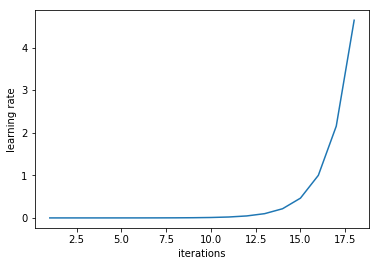

In [107]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

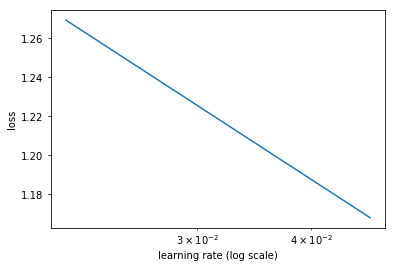

In [108]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we train the model, so you may want to re-run this function from time to time.

## Improving our model

### Data augmentation

If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [109]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [110]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [111]:
ims = np.stack([get_augs() for i in range(6)])

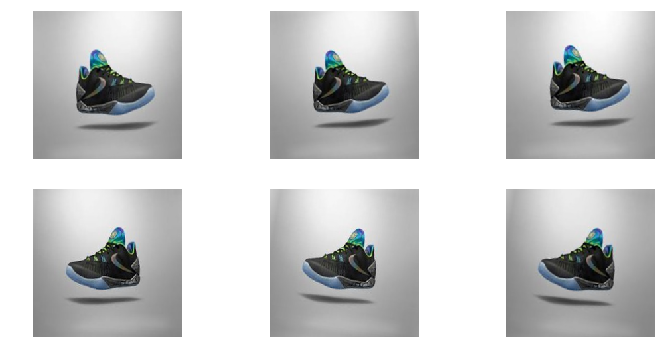

In [112]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [113]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [114]:
learn.fit(4*1e-2, 1)

A Jupyter Widget

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s, loss=1.39]

  6%|▌         | 1/18 [00:00<00:01,  9.33it/s, loss=1.39]

  6%|▌         | 1/18 [00:00<00:02,  7.06it/s, loss=1.14]

  6%|▌         | 1/18 [00:00<00:02,  5.77it/s, loss=0.879]

  6%|▌         | 1/18 [00:00<00:03,  5.38it/s, loss=0.733]

  6%|▌         | 1/18 [00:00<00:03,  4.78it/s, loss=0.628]

 28%|██▊       | 5/18 [00:00<00:00, 23.72it/s, loss=0.628]

 28%|██▊       | 5/18 [00:00<00:00, 20.16it/s, loss=0.538]

 28%|██▊       | 5/18 [00:00<00:00, 18.51it/s, loss=0.465]

 28%|██▊       | 5/18 [00:00<00:00, 17.05it/s, loss=0.427]

 28%|██▊       | 5/18 [00:00<00:00, 16.16it/s, loss=0.38] 

 28%|██▊       | 5/18 [00:00<00:00, 15.30it/s, loss=0.344]

 56%|█████▌    | 10/18 [00:00<00:00, 30.49it/s, loss=0.344]

 56%|█████▌    | 10/18 [00:00<00:00, 28.37it/s, loss=0.312]

 56%|█████▌    | 10/18 [00:00<00:00, 25.72it/s, loss=0.286]

 56%|█████▌    | 10/18 [00:00<00:00, 24.15it/s, loss=0.263]

 56%|█████▌    | 10/18 [00:00<00:00, 23.03it/s, loss=0.253]

 78%|███████▊  | 14/18 [00:00<00:00, 31.95it/s, loss=0.253]

 78%|███████▊  | 14/18 [00:00<00:00, 30.13it/s, loss=0.237]

 78%|███████▊  | 14/18 [00:00<00:00, 29.04it/s, loss=0.226]

 78%|███████▊  | 14/18 [00:00<00:00, 28.03it/s, loss=0.213]

 78%|███████▊  | 14/18 [00:00<00:00, 26.21it/s, loss=0.199]

epoch      trn_loss   val_loss   accuracy   
    0      0.199091   0.042827   0.97619   



By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

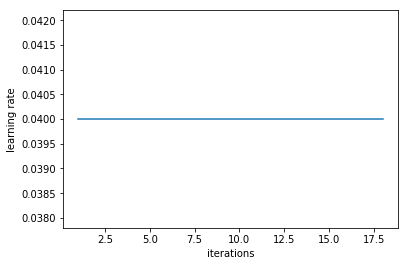

In [115]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [116]:
learn.save('224_all')

In [117]:
learn.load('224_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [118]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

  0%|          | 0/4 [00:00<?, ?it/s]

In [119]:
accuracy_np(probs, y)

0.9761904761904762

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [120]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[48  0  0]
 [ 0 36  3]
 [ 0  0 39]]


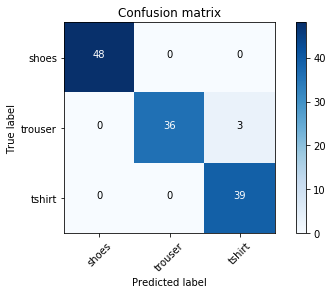

In [122]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect trousers


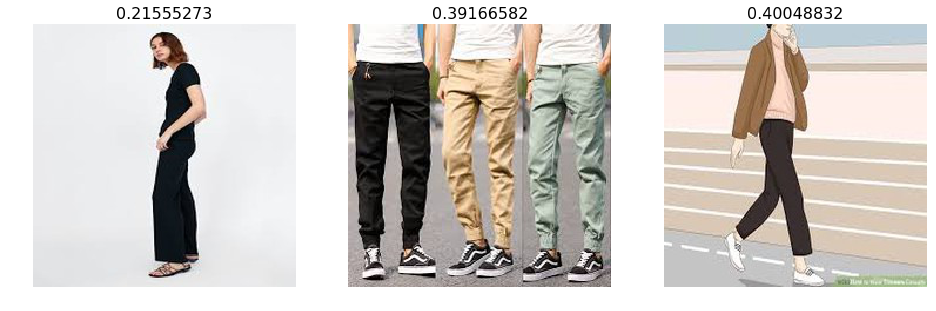

In [123]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect trousers")